# **DSCI 100 Final Project Planning Stage Individual Proposal**
### Github Project Link: https://github.com/MohakB3/dsci100-project
# Code

In [1]:
# Importing Libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [38]:
# Raw dataset URLs
player_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/players.csv"
sessions_data_url <- "https://raw.githubusercontent.com/MohakB3/dsci100-project/refs/heads/main/data/sessions.csv"

# Reading Data (with the column specification message disabled) and Omitting NAs
player_data <- na.omit(read_csv(player_data_url, show_col_types = FALSE))
sessions_data <- na.omit(read_csv(sessions_data_url, show_col_types = FALSE))

# Wrangling Sessions Data
sessions_wrangled_data <- sessions_data |>
    mutate(session_length = as.POSIXct(end_time,format = "%d/%m/%Y %H:%M") - as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    select(hashedEmail, session_length) |>
    group_by(hashedEmail) |>
    summarize(player_average_session_length = as.numeric(mean(session_length)))

# Merging Player Data and Wrangled Sessions Data
merged_data <- left_join(sessions_wrangled_data, player_data, by = "hashedEmail") |> na.omit()

# Calculating Mean Values for all Quantitative Variables
mean_quantitative_data <- merged_data |>
    summarize(mean_age = mean(Age), mean_played_hours = mean(played_hours), mean_session_length = mean(player_average_session_length))

# Creating a Density Plot for Players' Total Time Played
time_plot <- merged_data |>
    select(played_hours, subscribe) |>
    filter(played_hours >= 0, played_hours <= 20) |>
    ggplot(aes(x=played_hours, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(title = "Density plot of Time Played (hours)", 
         x="Time Played (hours)",
         y="Density",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Creating a Density Plot for Players' Age
age_plot <- merged_data |>
    select(Age, subscribe) |>
    ggplot(aes(x=Age, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(title = "Density plot of Player Age (years)", 
         x="Player Age (years)",
         y="Density",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Creating a Density Plot for Players' Average Session Length
session_length_plot <- merged_data |>
    select(player_average_session_length, subscribe) |>
    ggplot(aes(x=player_average_session_length, fill = subscribe, colour = subscribe)) + 
    geom_density(alpha = 0.5) +
    labs(title = "Density plot of Average Player Session Length (minutes)", 
         x="Average Session Length (minutes)",
         y="Density",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Creating a Scatter Plot of Player Average Session Length (minutes) vs Player Age (years)
plot_1 <- merged_data |>
    select(player_average_session_length, Age, played_hours, subscribe) |>
    ggplot(aes(x=Age, y= player_average_session_length, colour = subscribe)) +
    geom_point() +
    labs(title = "Scatter Plot of Player Average Session Length (minutes) vs Player Age (years)", 
         x="Player Age (years)",
         y="Player Average Session Length (minutes)",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Creating a Scatter Plot of Player's Total Playtime (hours) vs Player Age (years)
plot_2 <- merged_data |>
    select(player_average_session_length, Age, played_hours, subscribe) |>
    ggplot(aes(x=Age, y= played_hours, colour = subscribe)) +
    geom_point() +
    labs(title = "Scatter Plot of Player Total Playtime (hours) vs Player Age (years)", 
         x="Player Age (years)",
         y="Player's Total Playtime (hours)",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Creating a Scatter Plot of Player's Total Playtime (hours) vs Player Average Session Length (minutes)
plot_3 <- merged_data |>
    select(player_average_session_length, Age, played_hours, subscribe) |>
    ggplot(aes(x=player_average_session_length, y= played_hours, colour = subscribe)) +
    geom_point() +
    labs(title = "Scatter Plot of Player Total Playtime (hours) vs Player Average Session Length (minutes)", 
         x="Player Average Session Length (minutes)",
         y="Player's Total Playtime (hours)",
         fill = "Is Subscribed?", 
         colour = "Is Subscribed?")

# Data Description
The original source contains two datasets named "player.csv" and "sessions.csv".
### player.csv Variables:
| Variable Name | Description | Type |
| --- | --- | --- |
| experience | Player's experience level | Character |
| subscribe | Whether or not the player is subscribed to a game-related newsletter | Logical |
| hashedEmail | Player's unique hashed email | Character |
| played_hours | Total time the player has played (hours)| Double |
| name | Player's anonymized name | Character |
| gender | Player's gender | Character |
| Age | Player's age (years) | Double |

There are 7 total variables in the "player.csv" dataset, and they were collected through the PLAICraft site when a prospective player self-reports this information before they are able to play for the first time, with the exception for the played_hours variable, which is calculated by adding up the length of all their sessions.

### sessions.csv Variables:
| Variable Name | Description | Type |
| --- | --- | --- |
| hashedEmail | Player's experience level | Character |
| start_time | Time the player's session started (DD/MM/YYYY HH:mm) | Character |
| end_time | Time the player's session ended (DD/MM/YYYY HH:mm) | Character |
| original_start_time | Time the player's session started in Unix time (ms) | Double |
| original_end_time | Time the player's session ended in Unix time (ms) | Double |

There are 5 total variables in the "sessions.csv" dataset; hashedEmail is also collected through the player information form in the PLAICraft website, and the rest of the variables are recorded along with each individual session.

The dataset being used in the project is a combination of the player dataset and the sessions dataset. Each entry is synced up from both datasets with the hashedEmail variable, as that is consistent between the two. The "start_time" and "end_time" variables are subtracted to get the length of each session, and then the entries are grouped by the hashedEmail and summarized in order to get the average session length for each player. In order to avoid inconsistent data, all entries that included an NA value are removed.

# Questions
### **Chosen Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### **Specific Question:** To what accuracy can a player's *age*, *average session length*, and *total play time* predict whether the player is subscribed to a game-related newsletter in the merged player and sessions dataset?

# Exploratory Data Analysis and Visualization
### First 6 entries of the player.csv dataset

In [20]:
head(player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## First 6 entries of the sessions.csv dataset

In [21]:
head(sessions_data)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## First 6 entries of the combined dataset

In [22]:
head(merged_data)

hashedEmail,player_average_session_length,experience,subscribe,played_hours,name,gender,Age
<chr>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.00000,Regular,TRUE,1.5,Isaac,Male,20
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.00000,Pro,FALSE,0.4,Lyra,Male,21
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.00000,Beginner,TRUE,0.1,Osiris,Male,17
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.15385,Regular,TRUE,5.6,Winslow,Male,17
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,35.00000,Pro,TRUE,1.0,Knox,Male,17
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10.00000,Veteran,FALSE,0.1,Callum,Male,19


## Mean Values for the Quantitative Data:

In [23]:
mean_quantitative_data

mean_age,mean_played_hours,mean_session_length
<dbl>,<dbl>,<dbl>
21.58537,9.313008,32.85302


## Exploratory Visualizations
### Density Plots

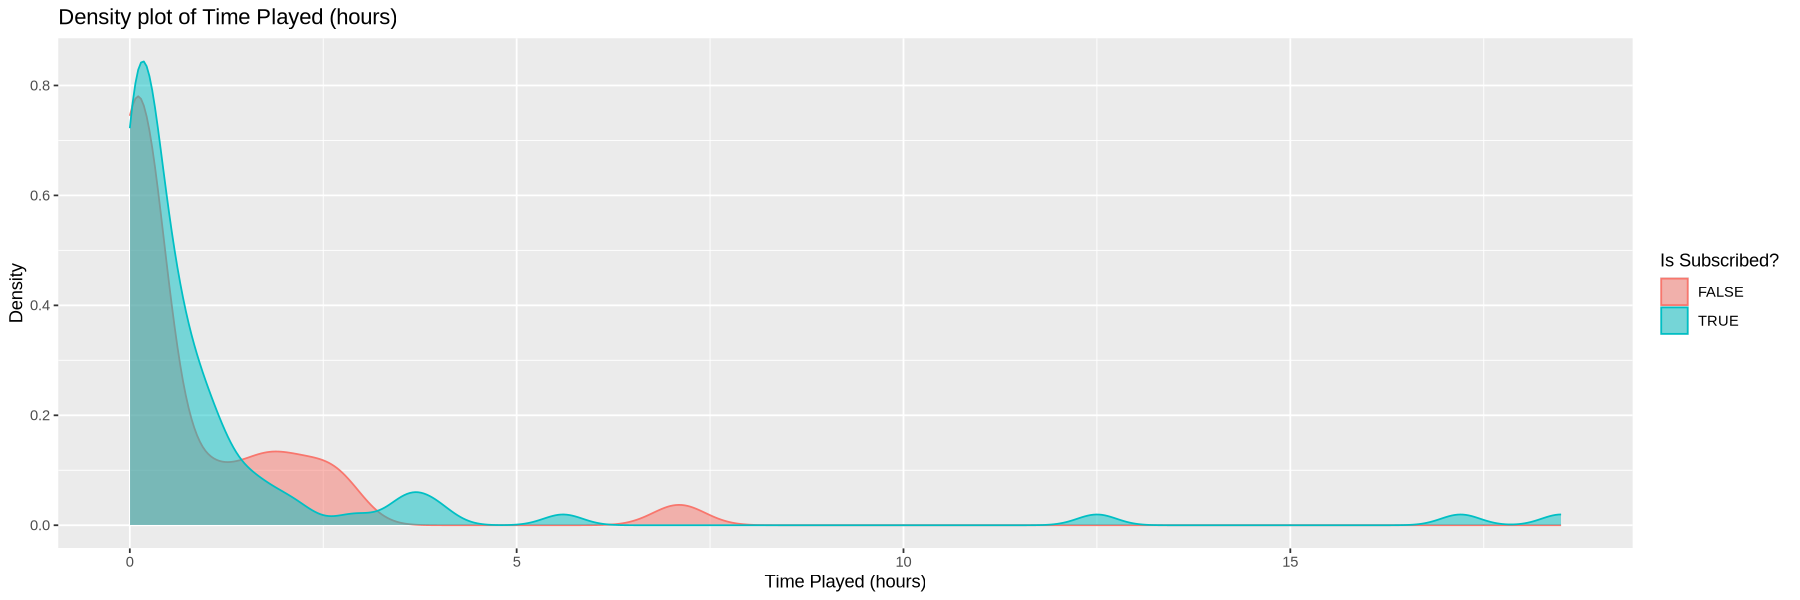

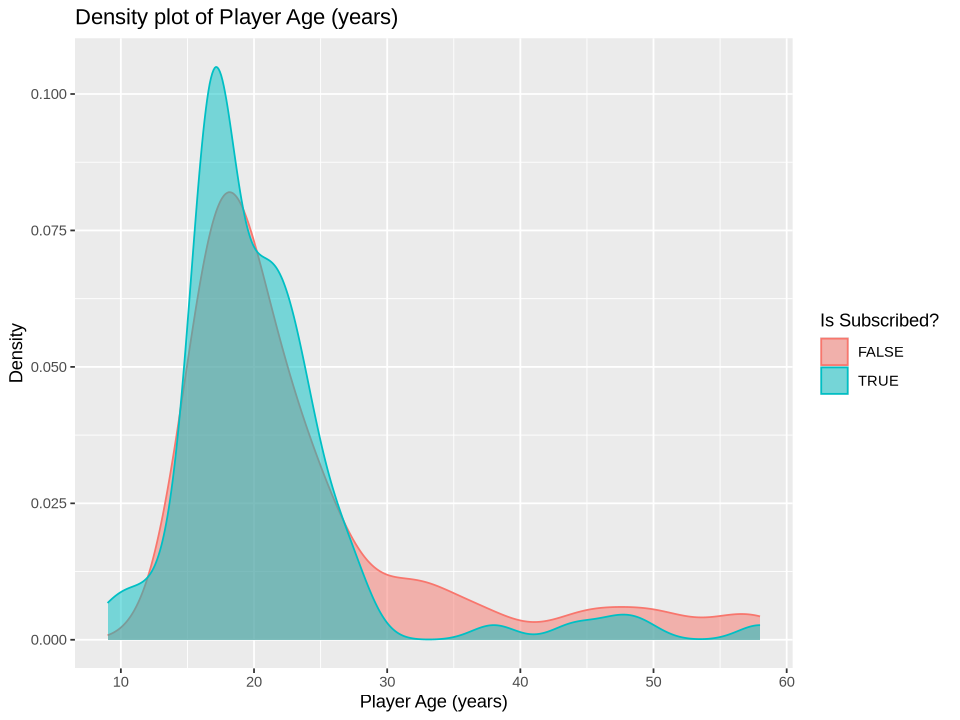

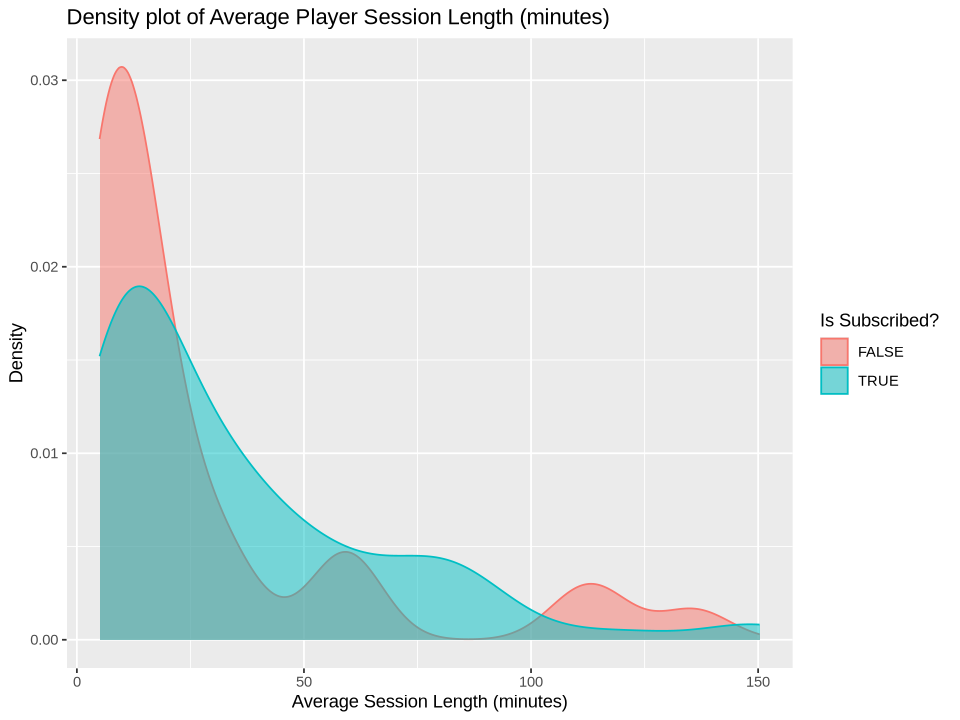

In [35]:
options(repr.plot.width = 15, repr.plot.height = 5)
time_plot
options(repr.plot.width = 8, repr.plot.height = 6)
age_plot
session_length_plot

**Insights**: For the Time Played and Player Age density plots, the density curve for the entries where the player is subscribed to a game-related newsletter and ones where the player isn't follow a fairly similar shape with the exception of some little portions peaking up. The density curves for the Average Session Length plot differ more as compared to the first two plots, which may indicate that Average Session Length is more useful for determining whether a player is subscribed to a game-related or not. 
### Scatterplots

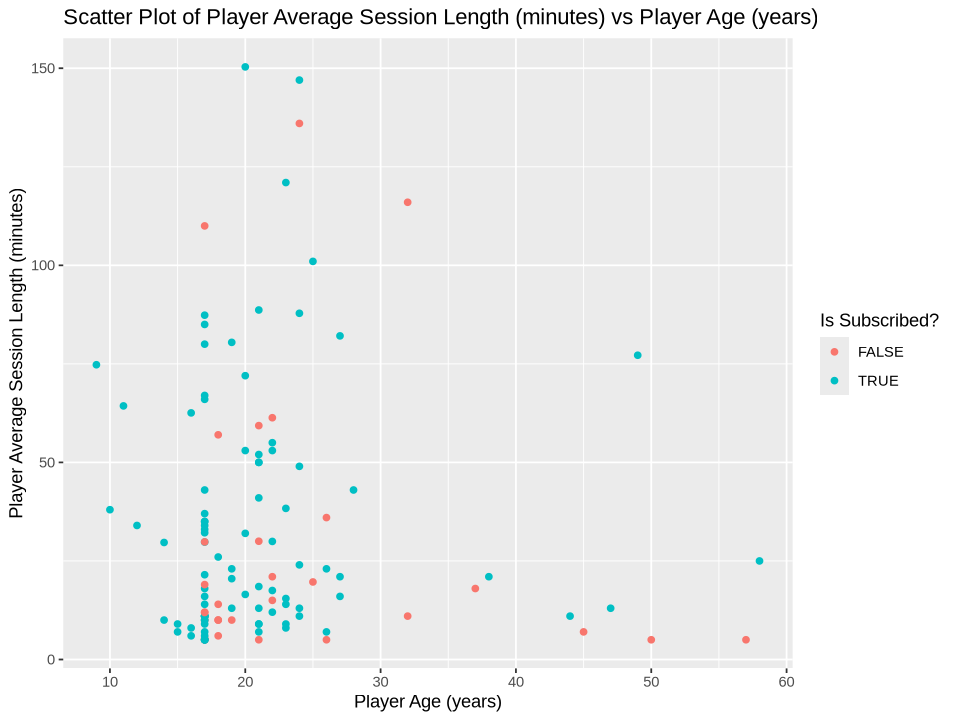

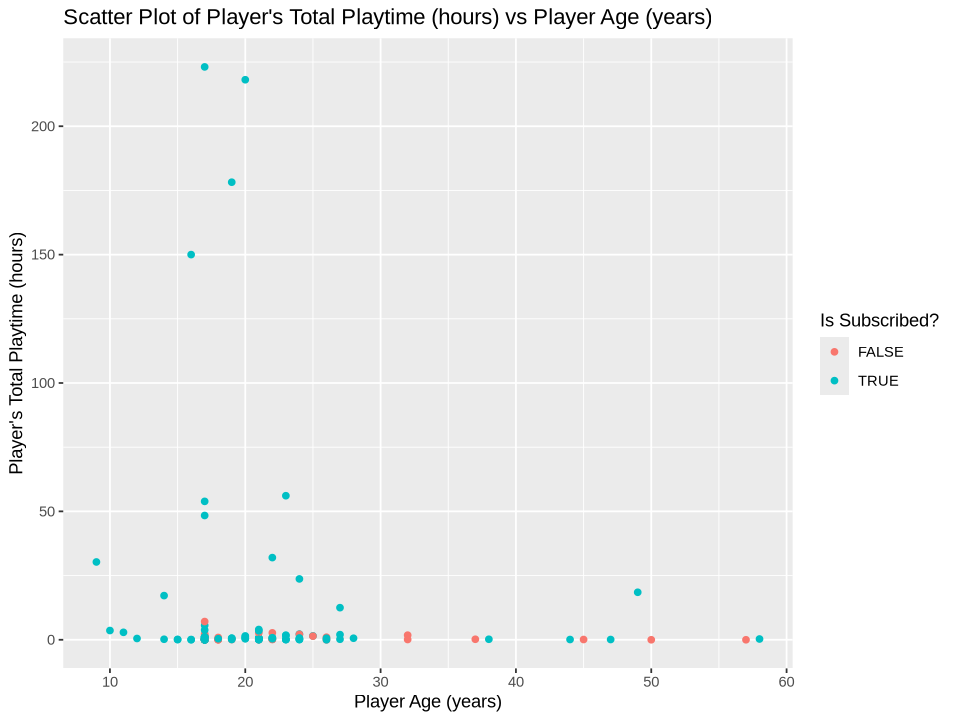

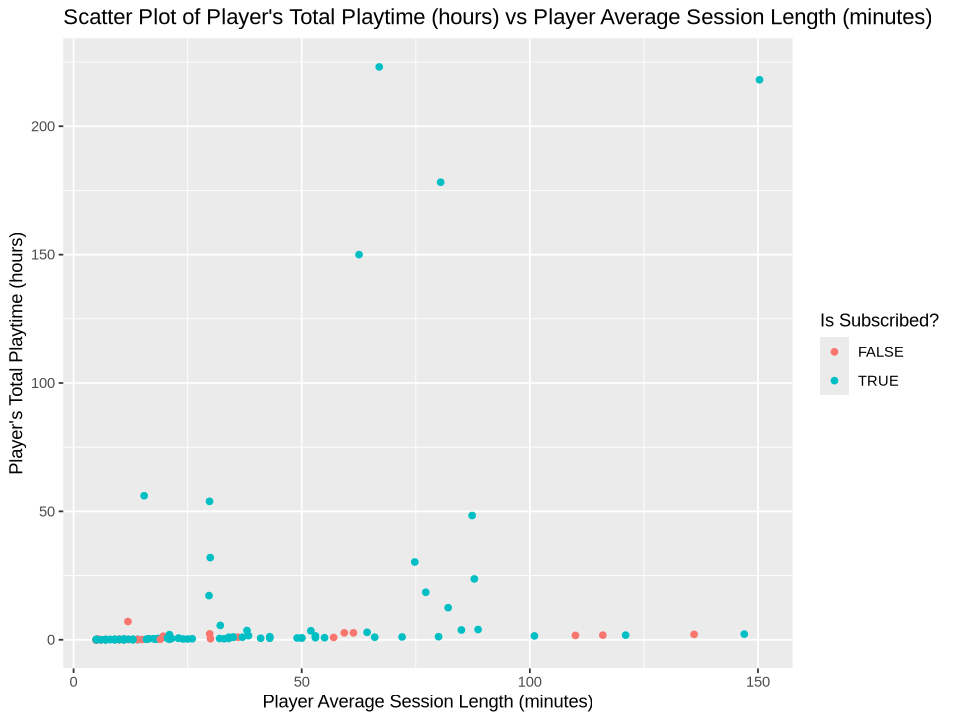

In [36]:
options(repr.plot.width = 8, repr.plot.height = 6)
plot_1
plot_2
plot_3

**Insights:** While none of these scatterplots show any real linear correlation between the two variables in any of these plots, the visual distribution of entries where the player is subscribed to a game-related newsletter does seem to show some vague patterns. In the Player Total Playtime vs Player Average Session Length and the Player Total Playtime vs Player Age plots, while most entries seem to be aligned in a horizontal line corresponding to 0 hours of total playtime, the variables exceeding that value on the y-axis exlusively consist of entries player is subscribed to a game-related newsletter. In the Player Average Session Length vs Player Age plot, the entries seem to form an L shape, which indicates that there is a strong non-linear relationship between the two variables.

# Methods and Plan
As we've discovered that none of the variables have any linear relationships with each other, and we've defined our broad question to be a classification problem, using a K-Nearest Neighbors (KNN) classifier seems most appropriate. Since KNN does not assume linearity, the only assumption we need to make is that there is some sort of a correlation between our chosen quantitative variables, and the categorical variable that we are going to be predicting. There is not much that can be done to compare and select different models as based on our critera, K-Nearest Neighbors is the model that we learned in class that works in this context. A potential weakness of KNN in our context is that this sort of classification model generally benefits from large datasets, and our merged dataset is quite small, having only 123 entries (a number of the entries were removed in favour of having no missing information, as there were a number of unique players that player data but no session data, and many of the session entries were grouped and summarized by unique players). Following common convention, the data can be split into 70% training data and 30% testing data; the training data can then be further split into a sub-training dataset and a validation dataset with another 70-30 split. This validation dataset will then finally be used for cross-validation with 5-folds. We can then tune the model to determine the number of neighbors K that produces the most accurate predictions, and then tune it again to determine relevant predictors. The model can then finally be tested with the testing data to determine its accuracy.